In [787]:
#1. Import Libraries\

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Disclaimer: I hsd to manually swap column 'Density\n(P/Km2)' to 'Density/n(P/Km2)'

The \n was making it difficult to work with the dataframe

In [788]:
# creating and empty DataFrame:
df = pd.DataFrame()

# loading a CSV file from local device and store it in a pandas DataFrame:
#data_types = {'Density/n(P/Km2)': 'float64'}
df = pd.read_csv('global-data-on-sustainable-energy.csv')#, dtype=data_types)
df['Density/n(P/Km2)'] = df['Density/n(P/Km2)'].replace(',', '', regex=True).astype(float)

In [789]:
#df[0::19] # we Only have 19 countries with a full list and no missing values, this is an issue, So lets see how many missing values we actually have

# View variable characteristics (number of null values, data names, data types)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3649 entries, 0 to 3648
Data columns (total 21 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Entity                                                            3649 non-null   object 
 1   Year                                                              3649 non-null   int64  
 2   Access to electricity (% of population)                           3639 non-null   float64
 3   Access to clean fuels for cooking                                 3480 non-null   float64
 4   Renewable-electricity-generating-capacity-per-capita              2718 non-null   float64
 5   Financial flows to developing countries (US $)                    1560 non-null   float64
 6   Renewable energy share in the total final energy consumption (%)  3455 non-null   float64
 7   Electricity from fossil fuels (TW

<h1>Feature transformations</h1>
<h4>In this section we will transform the NaN or null features and try different values to achieve a better result</h4>

In [790]:
#Get mean values for whole table ignoring NaN values
#this is a test to use nanmean


access = df["Access to electricity (% of population)"]
print(np.nanmean(access))
print("access nanmean = ",np.nanmean(access))
print("access mean = ",np.mean(access))
access

78.93370216207748
access nanmean =  78.93370216207748
access mean =  78.93370216207742


0       1.614
1       4.075
2       9.409
3      14.739
4      20.065
        ...  
3644   42.562
3645   44.179
3646   45.573
3647   46.781
3648   52.748
Name: Access to electricity (% of population), Length: 3649, dtype: float64

In [791]:
#Get mean values for whole table ignoring NaN values


renewPerCapita = df["Renewable-electricity-generating-capacity-per-capita"]
print("renewPerCapita nanmean = ",np.nanmean(renewPerCapita))
print("renewPerCapita mean = ",np.mean(renewPerCapita))
renewPerCapita

 

renewPerCapita nanmean =  113.13749816041205
renewPerCapita mean =  113.13749816041195


0       9.220
1       8.860
2       8.470
3       8.090
4       7.750
        ...  
3644   62.880
3645   62.330
3646   82.530
3647   81.400
3648   80.610
Name: Renewable-electricity-generating-capacity-per-capita, Length: 3649, dtype: float64

In [792]:
pd.options.display.float_format = '{:,.3f}'.format

val = df.mean(axis=0,numeric_only=True,skipna=True)
val

#these are the avg values for each column


Year                                                                    2,010.038
Access to electricity (% of population)                                    78.934
Access to clean fuels for cooking                                          63.255
Renewable-electricity-generating-capacity-per-capita                      113.137
Financial flows to developing countries (US $)                     94,224,000.000
Renewable energy share in the total final energy consumption (%)           32.638
Electricity from fossil fuels (TWh)                                        70.365
Electricity from nuclear (TWh)                                             13.450
Electricity from renewables (TWh)                                          23.968
Low-carbon electricity (% electricity)                                     36.801
Primary energy consumption per capita (kWh/person)                     25,743.982
Energy intensity level of primary energy (MJ/$2017 PPP GDP)                 5.307
Value_co2_emissi

In [793]:
#lets fill the nan values with average values for each column

df_filled_with_averages = df.fillna(df.mean())

print(df_filled_with_averages.info())

C:\Users\lucca\AppData\Local\Temp\ipykernel_84392\2489947689.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_filled_with_averages = df.fillna(df.mean())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3649 entries, 0 to 3648
Data columns (total 21 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Entity                                                            3649 non-null   object 
 1   Year                                                              3649 non-null   int64  
 2   Access to electricity (% of population)                           3649 non-null   float64
 3   Access to clean fuels for cooking                                 3649 non-null   float64
 4   Renewable-electricity-generating-capacity-per-capita              3649 non-null   float64
 5   Financial flows to developing countries (US $)                    3649 non-null   float64
 6   Renewable energy share in the total final energy consumption (%)  3649 non-null   float64
 7   Electricity from fossil fuels (TW

In [794]:
#print(df_filled_with_averages['Density/n(P/Km2)'].unique())

In [795]:
#lets run some tests
#I want to be able to separate the df based on a year cutoff since this is a time series
print(df["Year"].unique())

train_percent = 0.6#train percentage will be in range 0.5 to 0.85 so we have a minimum of 3 test data 
#every 0.5 train_percent advances 1 year from our scale

min_year = df["Year"].unique().min()
max_year = df["Year"].unique().max()

time_between = max_year - min_year
 
train_cutoff = int(min_year + train_percent * time_between)


train = df[df['Year'] <= train_cutoff]  # Train data: Year <= 2015
test = df[df['Year'] > train_cutoff]   # Test data: Year > 2015

train["Year"].max()

#from here we can separate the values based on year, Time series Achieved!
#Also we can use a similar method to separate df by country!
#so lets ignore this test and do the group separation


[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015 2016 2017 2018 2019 2020]


2012

In [796]:
#Function created since I was repeating a bunch the same code

from sklearn.linear_model import LinearRegression
from sklearn import metrics


def GetRmseFromDF(myDf, columnsToDrop, targetColumn):

    for i in np.arange(0.5, 0.9, 0.05):#from 0.2 to 0.85 in increments of 0.05 mean in this case the range of our year
        train_cutoff = int(min_year + i * time_between)
        # print(train_cutoff)#shows range from 2010 to 2017, so working!
        train = myDf[myDf['Year'] <= train_cutoff]
        test = myDf[myDf['Year'] > train_cutoff]
        
        # print(train["Year"].info())# Confirming it works properly
        #now we create our train and test dfs based on the new split, maybe I can later find a more elegant method
        X_train = train.drop(columns=columnsToDrop)
        y_train = train[targetColumn]
        X_test = test.drop(columns=columnsToDrop)
        y_test = test[targetColumn]
        
        
        my_linreg = LinearRegression()
        my_linreg.fit(X_train, y_train)
        y_prediction = my_linreg.predict(X_test)

        # print(y_prediction)
        
        # Calculating "Mean Square Error" (MSE):
        mse = metrics.mean_squared_error(y_test, y_prediction)

        # Using numpy sqrt function to take the square root and calculate "Root Mean Square Error" (RMSE)
        rmse = np.sqrt(mse)

        print(f"{train_cutoff = }, {rmse = :.10f}")
    
    # print(X_test.shape)

In [797]:
#now lets drop the features with high nan values. lets check which ones had a high percentage of replacements

# Number of zero values in the dataset (in percent)
missing_values_df = df.isnull().sum() / df.shape[0] * 100.00
print(round(missing_values_df),2)

#we have 3 tables that stick out with more than 25% of missing values
#lets try and dop them before we redo the same calculations

Entity                                                              0.000
Year                                                                0.000
Access to electricity (% of population)                             0.000
Access to clean fuels for cooking                                   5.000
Renewable-electricity-generating-capacity-per-capita               26.000
Financial flows to developing countries (US $)                     57.000
Renewable energy share in the total final energy consumption (%)    5.000
Electricity from fossil fuels (TWh)                                 1.000
Electricity from nuclear (TWh)                                      3.000
Electricity from renewables (TWh)                                   1.000
Low-carbon electricity (% electricity)                              1.000
Primary energy consumption per capita (kWh/person)                  0.000
Energy intensity level of primary energy (MJ/$2017 PPP GDP)         6.000
Value_co2_emissions_kt_by_country     

<h2>Target Column = "Renewable energy share in the total final energy consumption (%)"

In [798]:
#for now lets ignore country since we are making a prediction based on global values

targetColumn = "Renewable energy share in the total final energy consumption (%)"

columnsToDrop = ['Renewable energy share in the total final energy consumption (%)', 
                 'Entity']

print("dropped tables: None\n")
GetRmseFromDF(df_filled_with_averages, columnsToDrop, targetColumn)

dropped tables: None

train_cutoff = 2010, rmse = 14.8775200984
train_cutoff = 2011, rmse = 14.9168350829
train_cutoff = 2012, rmse = 15.0269779679
train_cutoff = 2013, rmse = 15.2103385571
train_cutoff = 2014, rmse = 15.4595995617
train_cutoff = 2015, rmse = 15.8627838763
train_cutoff = 2016, rmse = 16.4574375821
train_cutoff = 2017, rmse = 17.4746068002


In [799]:
#df_drop_features = df_filled_with_averages.drop(columns=['Renewables (% equivalent primary energy)', 'Financial flows to developing countries (US $)'])

#columns to drop:
# 'Renewable energy share in the total final energy consumption (%)', 
# 'Renewables (% equivalent primary energy)', 
# 'Financial flows to developing countries (US $)', 
# 'Entity'

columnsToDrop = ['Renewable energy share in the total final energy consumption (%)', 
                 'Entity',
                 'Financial flows to developing countries (US $)']

print("dropped tables:\n\t Financial flows to developing countries (US $)\n")
GetRmseFromDF(df_filled_with_averages, columnsToDrop, targetColumn)

dropped tables:
	 Financial flows to developing countries (US $)

train_cutoff = 2010, rmse = 14.8885361038
train_cutoff = 2011, rmse = 14.9491591505
train_cutoff = 2012, rmse = 15.0626475607
train_cutoff = 2013, rmse = 15.2451067129
train_cutoff = 2014, rmse = 15.5011029187
train_cutoff = 2015, rmse = 15.9059825943
train_cutoff = 2016, rmse = 16.5568191676
train_cutoff = 2017, rmse = 17.5785303560


In [800]:
#columns to drop:
# 'Renewable energy share in the total final energy consumption (%)', 
# 'Renewables (% equivalent primary energy)', 
# 'Financial flows to developing countries (US $)', 
# 'Entity'

columnsToDrop = ['Renewable energy share in the total final energy consumption (%)', 
                 'Entity',
                 'Financial flows to developing countries (US $)',
                 'Renewables (% equivalent primary energy)']

print("dropped tables:\n\t Financial flows to developing countries (US $)")
print("\t Renewables (% equivalent primary energy)\n")
GetRmseFromDF(df_filled_with_averages, columnsToDrop, targetColumn)

dropped tables:
	 Financial flows to developing countries (US $)
	 Renewables (% equivalent primary energy)

train_cutoff = 2010, rmse = 17.8497292274
train_cutoff = 2011, rmse = 17.7391092417
train_cutoff = 2012, rmse = 17.5837698556
train_cutoff = 2013, rmse = 17.5678636482
train_cutoff = 2014, rmse = 17.5227394016
train_cutoff = 2015, rmse = 17.7734197092
train_cutoff = 2016, rmse = 18.2375206324
train_cutoff = 2017, rmse = 19.0512627271


<h2>targetColumn = "Renewables (% equivalent primary energy)"

In [801]:
#now using renewables as the target actually really helped, the rmse is significantly better than before

targetColumn = "Renewables (% equivalent primary energy)"

columnsToDrop = ['Renewables (% equivalent primary energy)', 
                 'Entity',
                 'Latitude',
                 'Longitude']

print("dropped tables: None\n")
GetRmseFromDF(df_filled_with_averages, columnsToDrop, targetColumn)

dropped tables: None

train_cutoff = 2010, rmse = 11.0269414406
train_cutoff = 2011, rmse = 10.7898244878
train_cutoff = 2012, rmse = 10.3856145585
train_cutoff = 2013, rmse = 10.0588434755
train_cutoff = 2014, rmse = 9.5133916766
train_cutoff = 2015, rmse = 9.1998719497
train_cutoff = 2016, rmse = 8.9565719080
train_cutoff = 2017, rmse = 8.6865662333


In [802]:
columnsToDrop = ['Renewables (% equivalent primary energy)', 
                 'Entity',
                 'Financial flows to developing countries (US $)']

print("dropped tables:\n\t Financial flows to developing countries (US $)")
GetRmseFromDF(df_filled_with_averages, columnsToDrop, targetColumn)

dropped tables:
	 Financial flows to developing countries (US $)
train_cutoff = 2010, rmse = 11.0196573926
train_cutoff = 2011, rmse = 10.7418725584
train_cutoff = 2012, rmse = 10.3208086509
train_cutoff = 2013, rmse = 9.9783938102
train_cutoff = 2014, rmse = 9.4256436390
train_cutoff = 2015, rmse = 9.0977987770
train_cutoff = 2016, rmse = 8.7942223963
train_cutoff = 2017, rmse = 8.5522723981


In [803]:
columnsToDrop = ['Renewables (% equivalent primary energy)', 
                 'Entity',
                 'Financial flows to developing countries (US $)',
                 'Renewable energy share in the total final energy consumption (%)']

print("dropped tables:\n\t Financial flows to developing countries (US $)")
print("\t Renewable energy share in the total final energy consumption (%)\n")
GetRmseFromDF(df_filled_with_averages, columnsToDrop, targetColumn)

dropped tables:
	 Financial flows to developing countries (US $)
	 Renewable energy share in the total final energy consumption (%)

train_cutoff = 2010, rmse = 12.4888093059
train_cutoff = 2011, rmse = 12.1496045132
train_cutoff = 2012, rmse = 11.6346843478
train_cutoff = 2013, rmse = 11.2183162955
train_cutoff = 2014, rmse = 10.5338209328
train_cutoff = 2015, rmse = 10.1307409661
train_cutoff = 2016, rmse = 9.7186429661
train_cutoff = 2017, rmse = 9.3268321665


<h2>What if instead of avg I marked the value with 0 instead?

In [804]:
df_filled_with_zero = df.fillna(0)

print(df_filled_with_averages.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3649 entries, 0 to 3648
Data columns (total 21 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Entity                                                            3649 non-null   object 
 1   Year                                                              3649 non-null   int64  
 2   Access to electricity (% of population)                           3649 non-null   float64
 3   Access to clean fuels for cooking                                 3649 non-null   float64
 4   Renewable-electricity-generating-capacity-per-capita              3649 non-null   float64
 5   Financial flows to developing countries (US $)                    3649 non-null   float64
 6   Renewable energy share in the total final energy consumption (%)  3649 non-null   float64
 7   Electricity from fossil fuels (TW

In [805]:
#for now lets ignore country since we are making a prediction based on global values

targetColumn = "Renewable energy share in the total final energy consumption (%)"

columnsToDrop = ['Renewable energy share in the total final energy consumption (%)', 
                 'Entity']

print("dropped tables: None\n")
GetRmseFromDF(df_filled_with_zero, columnsToDrop, targetColumn)

dropped tables: None

train_cutoff = 2010, rmse = 18.1719085826
train_cutoff = 2011, rmse = 18.4140652412
train_cutoff = 2012, rmse = 18.9158333555
train_cutoff = 2013, rmse = 19.3858218050
train_cutoff = 2014, rmse = 20.0096268131
train_cutoff = 2015, rmse = 20.8164403314
train_cutoff = 2016, rmse = 22.0765703339
train_cutoff = 2017, rmse = 23.9929585455


In [806]:
#now using renewables as the target actually really helped, the rmse is significantly better than before

targetColumn = "Renewables (% equivalent primary energy)"

columnsToDrop = ['Renewables (% equivalent primary energy)', 
                 'Entity',
                 'Latitude',
                 'Longitude']

print("dropped tables: None\n")
GetRmseFromDF(df_filled_with_zero, columnsToDrop, targetColumn)

dropped tables: None

train_cutoff = 2010, rmse = 12.9904906121
train_cutoff = 2011, rmse = 12.6840377439
train_cutoff = 2012, rmse = 12.2475180268
train_cutoff = 2013, rmse = 11.9354142292
train_cutoff = 2014, rmse = 11.3945647047
train_cutoff = 2015, rmse = 11.1851567420
train_cutoff = 2016, rmse = 10.9820819225
train_cutoff = 2017, rmse = 10.9698692882


In [807]:
#df_filled_with_zero_drop = df_filled_with_zero.drop(columns=['Renewable-electricity-generating-capacity-per-capita',  'Renewable-electricity-generating-capacity-per-capita'])

columnsToDrop = ['Renewables (% equivalent primary energy)', 'Entity']
targetColumn = "Renewables (% equivalent primary energy)"

GetRmseFromDF(df_filled_with_zero, columnsToDrop, targetColumn)

train_cutoff = 2010, rmse = 13.2583220779
train_cutoff = 2011, rmse = 12.9261471203
train_cutoff = 2012, rmse = 12.4487117239
train_cutoff = 2013, rmse = 12.1074094867
train_cutoff = 2014, rmse = 11.5234479306
train_cutoff = 2015, rmse = 11.2879007311
train_cutoff = 2016, rmse = 11.0583182279
train_cutoff = 2017, rmse = 11.0189457793


In [808]:

columnsToDrop = ['Renewable energy share in the total final energy consumption (%)', 'Renewables (% equivalent primary energy)', 'Financial flows to developing countries (US $)', 'Entity' ]
targetColumn = "Renewables (% equivalent primary energy)"

GetRmseFromDF(df_filled_with_zero, columnsToDrop, targetColumn)

train_cutoff = 2010, rmse = 14.7261397230
train_cutoff = 2011, rmse = 14.2934900869
train_cutoff = 2012, rmse = 13.6293565311
train_cutoff = 2013, rmse = 13.1453632688
train_cutoff = 2014, rmse = 12.3384287321
train_cutoff = 2015, rmse = 11.9517613309
train_cutoff = 2016, rmse = 11.5740008142
train_cutoff = 2017, rmse = 11.2212174058


As you can see out rmse is Quite bad. and the lower the cuttoff the better... meaning that its almost a guess at this point our prediction.

So lets now separate per country, while we wont have much data to train, we might have better results


In [809]:
# #Now lets try a basic logreg using these values
# #for this, lets first try a few different train test splits

# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LogisticRegression

# # Lists to store results
# test_sizes = []
# accuracies = []

# # Iterate through different test sizes
# for i in np.arange(0.5,1,0.05):
#     test_sizes.append(i)
    
    
#     # Split the data
#     X_train, X_test, y_train, y_test = train_test_split(df_features, Re_Percent, test_size=i, random_state=5)

#     # Train logistic regression model
#     model = LogisticRegression(max_iter=1000)
#     model.fit(X_train, y_train)
    
#     # Evaluate accuracy
#     accuracy = model.score(X_test, y_test)
#     accuracies.append(accuracy)

# # Find the best test size based on highest accuracy
# best_test_size = test_sizes[accuracies.index(max(accuracies))]
# best_accuracy = max(accuracies)

# print(f"Best test size: {best_test_size} with accuracy: {best_accuracy}")


<h1>Messing with DF tables of country</h1>

<h3>first I will try using the df filled with avgs</h3>
Then I will try filling the column withthe avg of its own country if possible otherwise try with 0 and global avg

In [810]:
#we can easily get the values of each country here
country_List = df['Entity'].unique()
# for country in country_List:
#     print(country)
# country_List

In [811]:
#rmse with fixed cutoff
def RmseWithFixedCutoff(myDf, cutoff, columnsToDrop, targetColumn):

    #separate trtain and test data based on the cutoff
    train = myDf[myDf['Year'] <= cutoff]
    test = myDf[myDf['Year'] > cutoff]
    
    #now we create our train and test dfs based on the new split, maybe I can later find a more elegant method
    X_train = train.drop(columns=columnsToDrop)
    y_train = train[targetColumn]
    X_test = test.drop(columns=columnsToDrop)
    y_test = test[targetColumn]
    
    
    my_linreg = LinearRegression()
    my_linreg.fit(X_train, y_train)

    if(X_test.shape[0] == 0):
        print(myDf['Entity'].unique(), " is missing features, please check")
    else:
        y_prediction = my_linreg.predict(X_test)

    # Calculating "Mean Square Error" (MSE):
        mse = metrics.mean_squared_error(y_test, y_prediction)

    # Using numpy sqrt function to take the square root and calculate "Root Mean Square Error" (RMSE)
        rmse = np.sqrt(mse)

    #print(f"{cutoff = }, {rmse = :.10f}")

        return rmse
    return None

In [812]:
# fill df with self averages if possible otherwise use given value
# if value = 0, fill with 0
# if value = 1, fill with global avg
# testTable = df[df['Entity'] == 'Aruba']


# val = testTable.mean(axis=0,numeric_only=True,skipna=True)

# vals will be the same as testTable but filled with avgs from the same table
# plus if still nan fill with 0 instead
# vals = testTable.fillna(val)
# vals = vals.fillna(0)

# vals
# df.fillna(df.mean())

def fillDataframe(dataframe, fill):
    val = dataframe.mean(axis=0,numeric_only=True,skipna=True)
    filled_df = pd.DataFrame()
    # FILL NAN WITH 0
    if(fill == 0):
        filled_df = dataframe.fillna(0)
    
    # FILL NAN WITH SELF AVGS, put 0 if there are stil nan values
    elif (fill == 1):
        filled_df = dataframe.fillna(val)
        filled_df = filled_df.fillna(0)

    # FILL NAN WITH GLOBAL AVGS
    elif (fill == 2):
        filled_df = dataframe.fillna(df.mean(numeric_only=True))

    return filled_df



In [813]:
# lets rewrite the RMSE function to have a fixed cutoff at 2017 and test each country individually 
# first based only on itself
# Then we can make it based on global numbers
# And finally we can use lat and long to make the prediction based on a given distance
cols_drop = ['Entity', 'Renewable energy share in the total final energy consumption (%)']
target = "Renewable energy share in the total final energy consumption (%)"

ct_rmse = []

for ct in country_List:
    ct_df = df[df['Entity'] == ct]

    avg_ct_df = fillDataframe(ct_df, 1)
    rmse_self_Avg = RmseWithFixedCutoff(avg_ct_df, 2017, cols_drop,target)

    zero_ct_df = fillDataframe(ct_df, 0)
    rmse_zero_fill = RmseWithFixedCutoff(zero_ct_df, 2017, cols_drop,target)

    global_ct_df = fillDataframe(ct_df, 2)
    rmse_global_Avg = RmseWithFixedCutoff(global_ct_df, 2017, cols_drop,target)

    ct_rmse.append([ct, rmse_self_Avg, rmse_zero_fill, rmse_global_Avg])

# Assuming ct_rmse contains the list of tuples (country, RMSE)
sorted_ct_rmse = sorted(ct_rmse, key=lambda x: x[1] if x[1] is not None else float('inf'))

# Print the sorted list of tuples (country, RMSE)
# for country, avg_rmse, zero_rmse, gl_rmse in sorted_ct_rmse:
#     print(f"Country: {country:<30} LocalRMSE: {avg_rmse:.10f}   ZeroRMSE: {zero_rmse:.10f}   GlobalRMSE: {gl_rmse:.10f}")

#rmse = RmseWithFixedCutoff(ctdf_filled, cols_drop, target)

#print(ct_rsme)
    

['French Guiana']  is missing features, please check
['French Guiana']  is missing features, please check
['French Guiana']  is missing features, please check


In [814]:
# Assuming sorted_ct_rmse contains the sorted list of tuples (country, avg_rmse, zero_rmse, gl_rmse)
print("RMSE VALUES ONLY USING DATA FROM WITHIN A COUNTRY")
print("-" * 80)  # Add a separator
print(f"{'Country':<30} {'LocalRMSE':<20} {'ZeroRMSE':<20} {'GlobalRMSE':<20}")  # Header for columns
print("-" * 80)  # Add a separator

for idx, (country, avg_rmse, zero_rmse, gl_rmse) in enumerate(sorted_ct_rmse, start=1):
    # Check for None values before formatting floats
    avg_rmse_str = f"{avg_rmse:.10f}" if avg_rmse is not None else "N/A"
    zero_rmse_str = f"{zero_rmse:.10f}" if zero_rmse is not None else "N/A"
    gl_rmse_str = f"{gl_rmse:.10f}" if gl_rmse is not None else "N/A"

    # Use a different style for odd rows
   
    print(f"{country:<30} {avg_rmse_str:<20} {zero_rmse_str:<20} {gl_rmse_str:<20}")


RMSE VALUES ONLY USING DATA FROM WITHIN A COUNTRY
--------------------------------------------------------------------------------
Country                        LocalRMSE            ZeroRMSE             GlobalRMSE          
--------------------------------------------------------------------------------
Albania                        0.0000000000         0.0000000000         0.0000000000        
Bahrain                        0.0000000000         0.0000000000         18.8436533361       
Oman                           0.0000000000         0.0000000000         18.8436533361       
Cayman Islands                 0.0111167614         0.0321613345         28.4836244476       
Turkmenistan                   0.0153437185         0.1265644560         18.8723965749       
Trinidad and Tobago            0.0337919831         0.4793348395         18.7992730451       
Central African Republic       0.0864052620         53.8630661937        353.4971860491      
Kuwait                         0.146

In [815]:
#getting diffeerence in shapes
for ct in country_List:
    ct_df = df[df['Entity'] == ct]
    if(ct_df.shape[0] != 21):
        print(ct,"_df has a different shape, ", ct_df.shape)

French Guiana _df has a different shape,  (1, 21)
Montenegro _df has a different shape,  (14, 21)
Serbia _df has a different shape,  (14, 21)


South Sudan _df has a different shape,  (8, 21)


<h1>Lets experiment with distance based on LATITUDE and LONGITUDE</h1>

In [816]:
from math import radians, sin, cos, sqrt, atan2

# Function to calculate distance between two lat-long points using Haversine formula
def calculate_distance(lat1, lon1, lat2, lon2):
    # Radius of the Earth in kilometers
    R = 6371.0
    
    # Convert latitude and longitude from degrees to radians
    lat1_rad = radians(lat1)
    lon1_rad = radians(lon1)
    lat2_rad = radians(lat2)
    lon2_rad = radians(lon2)
    
    # Calculate differences in coordinates
    dlon = lon2_rad - lon1_rad
    dlat = lat2_rad - lat1_rad
    
    # Haversine formula to calculate distance
    a = sin(dlat / 2)**2 + cos(lat1_rad) * cos(lat2_rad) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    distance = R * c
    
    return distance




In [817]:
# Function to get rows within range of latitude and longitude from a specified country
def get_countries_within_range(df, country_name, range_km):
    country_row = df[df['Entity'] == country_name]
    if country_row.empty:
        return pd.DataFrame()  # Return an empty DataFrame if country not found
    
    country_lat = country_row['Latitude'].iloc[0]
    country_lon = country_row['Longitude'].iloc[0]

    # Calculate distances and filter rows within range
    distances = df.apply(lambda row: calculate_distance(country_lat, country_lon, row['Latitude'], row['Longitude']), axis=1)
    nearby_countries = df[distances <= range_km]
    
    return nearby_countries


In [818]:
for country in country_List:
    nearby_rows = get_countries_within_range(df, country, 1000)
    print(f"{country}: rows in df {nearby_rows.shape[0]}")

#this is a slow process unfortunately, but it gets the job done. so from here, lets repeat the previous step
#later we can test with different distances

Afghanistan: rows in df 105


Albania: rows in df 301
Algeria: rows in df 63
Angola: rows in df 42
Antigua and Barbuda: rows in df 210
Argentina: rows in df 63
Armenia: rows in df 105
Aruba: rows in df 210
Australia: rows in df 21
Austria: rows in df 406
Azerbaijan: rows in df 84
Bahamas: rows in df 84
Bahrain: rows in df 126
Bangladesh: rows in df 84
Barbados: rows in df 210
Belarus: rows in df 252
Belgium: rows in df 252
Belize: rows in df 126
Benin: rows in df 105
Bermuda: rows in df 21
Bhutan: rows in df 84
Bosnia and Herzegovina: rows in df 385
Botswana: rows in df 126
Brazil: rows in df 21
Bulgaria: rows in df 280
Burkina Faso: rows in df 126
Burundi: rows in df 84
Cambodia: rows in df 63
Cameroon: rows in df 105
Canada: rows in df 21
Cayman Islands: rows in df 42
Central African Republic: rows in df 42
Chad: rows in df 21
Chile: rows in df 42
China: rows in df 21
Colombia: rows in df 63
Comoros: rows in df 63
Congo: rows in df 105
Costa Rica: rows in df 147
Croatia: rows in df 385
Cuba: rows in df 105
Cyprus

In [819]:
cols_drop = ['Entity', 'Renewable energy share in the total final energy consumption (%)']
target = "Renewable energy share in the total final energy consumption (%)"

ct_rmse_distance = []

for ct in country_List:
    ct_df_distance = get_countries_within_range(df, ct, 500)

    if(ct_df_distance.shape[0] > 21):

        avg_ct_df = fillDataframe(ct_df_distance, 1)
        rmse_self_Avg = RmseWithFixedCutoff(avg_ct_df, 2017, cols_drop,target)

        zero_ct_df = fillDataframe(ct_df_distance, 0)
        rmse_zero_fill = RmseWithFixedCutoff(zero_ct_df, 2017, cols_drop,target)

        global_ct_df = fillDataframe(ct_df_distance, 2)
        rmse_global_Avg = RmseWithFixedCutoff(global_ct_df, 2017, cols_drop,target)

        ct_rmse_distance.append([ct, rmse_self_Avg, rmse_zero_fill, rmse_global_Avg])


In [820]:
sorted_ct_rmse_distance = sorted(ct_rmse_distance, key=lambda x: x[1] if x[1] is not None else float('inf'))

In [821]:
# Assuming sorted_ct_rmse contains the sorted list of tuples (country, avg_rmse, zero_rmse, gl_rmse)
print("RMSE VALUES USING DATA FROM COUNTRIES WITHIN 500KM DISTANCE")
print("-" * 80)  # Add a separator
print(f"{'Country':<30} {'LocalRMSE':<20} {'ZeroRMSE':<20} {'GlobalRMSE':<20}")  # Header for columns
print("-" * 80)  # Add a separator

for idx, (country, avg_rmse, zero_rmse, gl_rmse) in enumerate(sorted_ct_rmse_distance, start=1):
    # Check for None values before formatting floats
    avg_rmse_str = f"{avg_rmse:.10f}" if avg_rmse is not None else "N/A"
    zero_rmse_str = f"{zero_rmse:.10f}" if zero_rmse is not None else "N/A"
    gl_rmse_str = f"{gl_rmse:.10f}" if gl_rmse is not None else "N/A"

    # Use a different style for odd rows
   
    print(f"{country:<30} {avg_rmse_str:<20} {zero_rmse_str:<20} {gl_rmse_str:<20}")


RMSE VALUES USING DATA FROM COUNTRIES WITHIN 500KM DISTANCE
--------------------------------------------------------------------------------
Country                        LocalRMSE            ZeroRMSE             GlobalRMSE          
--------------------------------------------------------------------------------
Kuwait                         0.0173777728         0.0189127933         18.8408575550       
Bahrain                        0.1129557526         0.1793029603         18.8360529535       
United Arab Emirates           0.1390925568         0.1520412587         18.7503713662       
Qatar                          0.1605576969         0.2447998168         18.7654828929       
Oman                           0.2923119157         0.3329125409         18.6648049894       
Malaysia                       1.1324754512         1.6661693995         16.9444222016       
Singapore                      1.1324754512         1.6661693995         16.9444222016       
Israel                    

<h3>Now the difference from the values

In [822]:
rmse_comparison = []
for country, avg_rmse_d, zero_rmse_d, gl_rmse_d in sorted_ct_rmse_distance:
    for country2, avg_rmse, zero_rmse, gl_rmse in sorted_ct_rmse:
        if (country == country2):
            avg_diff = avg_rmse - avg_rmse_d
            zero_diff = zero_rmse - zero_rmse_d
            gl_diff = gl_rmse - gl_rmse_d

            rmse_comparison.append([country, avg_diff, zero_diff, gl_diff])

sorted_rmse_comparison = sorted(rmse_comparison, key=lambda x: x[1] if x[1] is not None else float('inf'))

In [823]:
# Assuming sorted_ct_rmse contains the sorted list of tuples (country, avg_rmse, zero_rmse, gl_rmse)
print("DIFFERENCE BETWEEN COUNTRY ONLY RMSE AND DISTANCE BASED RMSE")
print("-" * 80)  # Add a separator
print(f"{'Country':<30} {'LocalRMSE diff':<20} {'ZeroRMSE diff':<20} {'GlobalRMSE diff':<20}")  # Header for columns
print("-" * 80)  # Add a separator

for idx, (country, avg_rmse, zero_rmse, gl_rmse) in enumerate(sorted_rmse_comparison, start=1):
    # Check for None values before formatting floats
    avg_rmse_str = f"{avg_rmse:.10f}" if avg_rmse is not None else "N/A"
    zero_rmse_str = f"{zero_rmse:.10f}" if zero_rmse is not None else "N/A"
    gl_rmse_str = f"{gl_rmse:.10f}" if gl_rmse is not None else "N/A"

    # Use a different style for odd rows
   
    print(f"{country:<30} {avg_rmse_str:<20} {zero_rmse_str:<20} {gl_rmse_str:<20}")


DIFFERENCE BETWEEN COUNTRY ONLY RMSE AND DISTANCE BASED RMSE
--------------------------------------------------------------------------------
Country                        LocalRMSE diff       ZeroRMSE diff        GlobalRMSE diff     
--------------------------------------------------------------------------------
Ethiopia                       -16.7289514986       20.6236370625        -11.9497147101      
Guinea-Bissau                  -16.7228320175       24.9996828125        3797.5495246527     
Eritrea                        -15.7758709453       21.9814948009        -2515.0851120044    
Pakistan                       -15.6847282488       13.9937582651        -21.0708728913      
Gambia                         -13.1580556508       15.4871823096        -150.6709858842     
Belarus                        -12.4863704848       -10.1749176196       -22.1206973077      
Puerto Rico                    -12.4129067416       -16.5863528687       -47.6265632691      
Senegal                  

In [833]:
# Assuming sorted_ct_rmse and sorted_ct_rmse_distance are lists of tuples with values for each country
for idx, (country, avg_rmse, zero_rmse, gl_rmse) in enumerate(sorted_ct_rmse):
    for country_distance, avg_rmse_distance, zero_rmse_distance, gl_rmse_distance in sorted_ct_rmse_distance:
        if country == country_distance:
            print(f"Country: {country:<20} | Values: Avg RMSE: {avg_rmse:.10f} Zero RMSE: {zero_rmse:.10f} Global RMSE: {gl_rmse:.10f}")
            print(f"{'':<20} | Values Distance: Avg RMSE: {avg_rmse_distance:.10f} Zero RMSE: {zero_rmse_distance:.10f} Global RMSE: {gl_rmse_distance:.10f}")
            print(f"{'':<25} | Difference: Avg RMSE: {avg_rmse_distance - avg_rmse:.10f} Zero RMSE: {zero_rmse_distance - zero_rmse:.10f} Global RMSE: {gl_rmse_distance - gl_rmse:.10f}")
            print()
            break


Country: Albania              | Values: Avg RMSE: 0.0000000000 Zero RMSE: 0.0000000000 Global RMSE: 0.0000000000
                     | Values Distance: Avg RMSE: 6.4176944122 Zero RMSE: 19.0901449592 Global RMSE: 41.3806691979
                          | Difference: Avg RMSE: 6.4176944122 Zero RMSE: 19.0901449592 Global RMSE: 41.3806691979

Country: Bahrain              | Values: Avg RMSE: 0.0000000000 Zero RMSE: 0.0000000000 Global RMSE: 18.8436533361
                     | Values Distance: Avg RMSE: 0.1129557526 Zero RMSE: 0.1793029603 Global RMSE: 18.8360529535
                          | Difference: Avg RMSE: 0.1129557526 Zero RMSE: 0.1793029603 Global RMSE: -0.0076003825

Country: Oman                 | Values: Avg RMSE: 0.0000000000 Zero RMSE: 0.0000000000 Global RMSE: 18.8436533361
                     | Values Distance: Avg RMSE: 0.2923119157 Zero RMSE: 0.3329125409 Global RMSE: 18.6648049894
                          | Difference: Avg RMSE: 0.2923119157 Zero RMSE: 0.332912540

<h1>Creating some Graphs

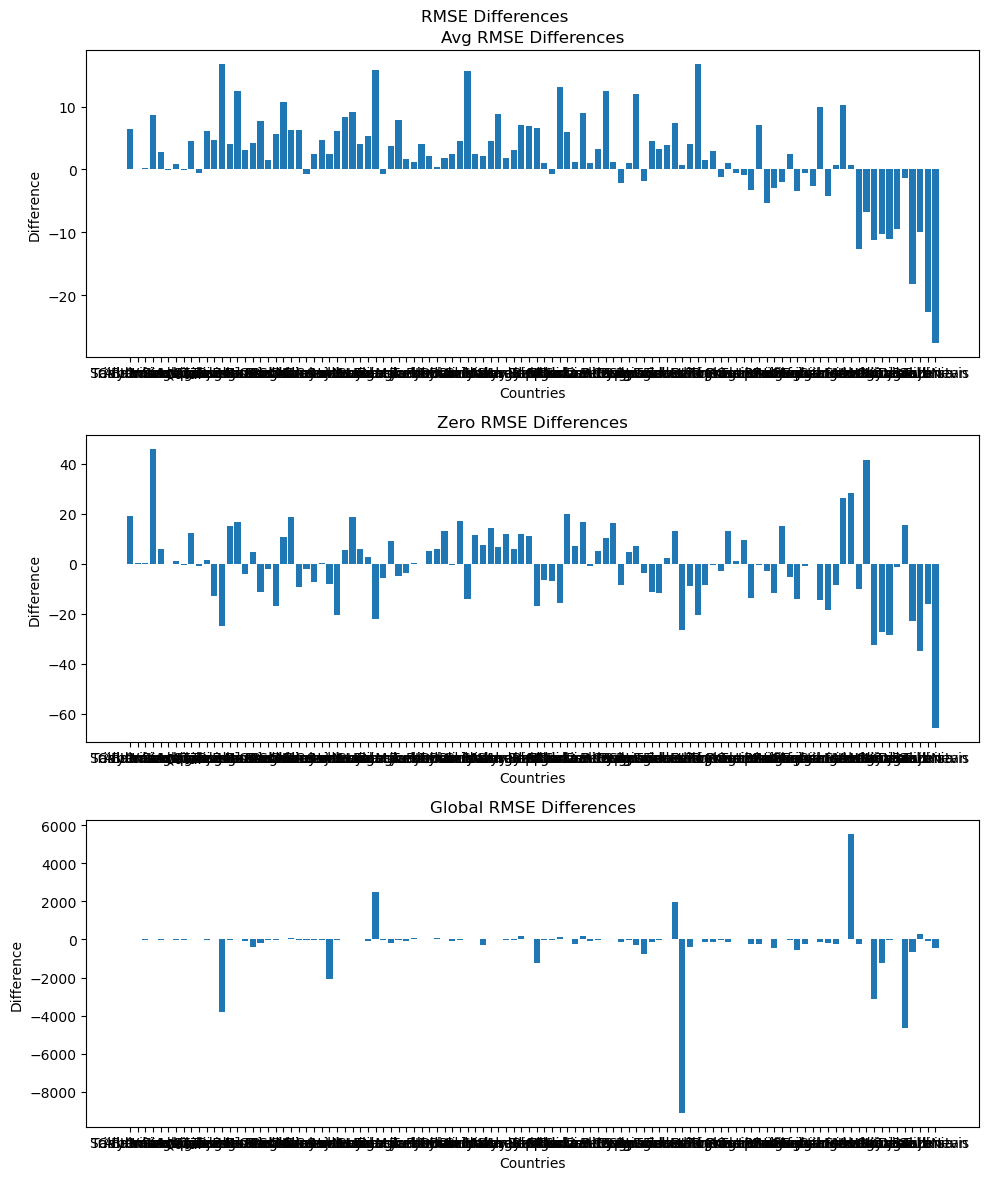

In [834]:
import matplotlib.pyplot as plt

# Assuming sorted_ct_rmse and sorted_ct_rmse_distance are lists of tuples with values for each country

countries = []
avg_rmse_diff = []
zero_rmse_diff = []
gl_rmse_diff = []

for idx, (country, avg_rmse, zero_rmse, gl_rmse) in enumerate(sorted_ct_rmse):
    for country_distance, avg_rmse_distance, zero_rmse_distance, gl_rmse_distance in sorted_ct_rmse_distance:
        if country == country_distance:
            countries.append(country)
            avg_rmse_diff.append(avg_rmse_distance - avg_rmse)
            zero_rmse_diff.append(zero_rmse_distance - zero_rmse)
            gl_rmse_diff.append(gl_rmse_distance - gl_rmse)
            break

# Creating subplots for each RMSE metric
fig, axs = plt.subplots(3, figsize=(10, 12))
fig.suptitle('RMSE Differences')

# Bar plot for Avg RMSE differences
axs[0].bar(countries, avg_rmse_diff)
axs[0].set_title('Avg RMSE Differences')
axs[0].set_xlabel('Countries')
axs[0].set_ylabel('Difference')

# Bar plot for Zero RMSE differences
axs[1].bar(countries, zero_rmse_diff)
axs[1].set_title('Zero RMSE Differences')
axs[1].set_xlabel('Countries')
axs[1].set_ylabel('Difference')

# Bar plot for Global RMSE differences
axs[2].bar(countries, gl_rmse_diff)
axs[2].set_title('Global RMSE Differences')
axs[2].set_xlabel('Countries')
axs[2].set_ylabel('Difference')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


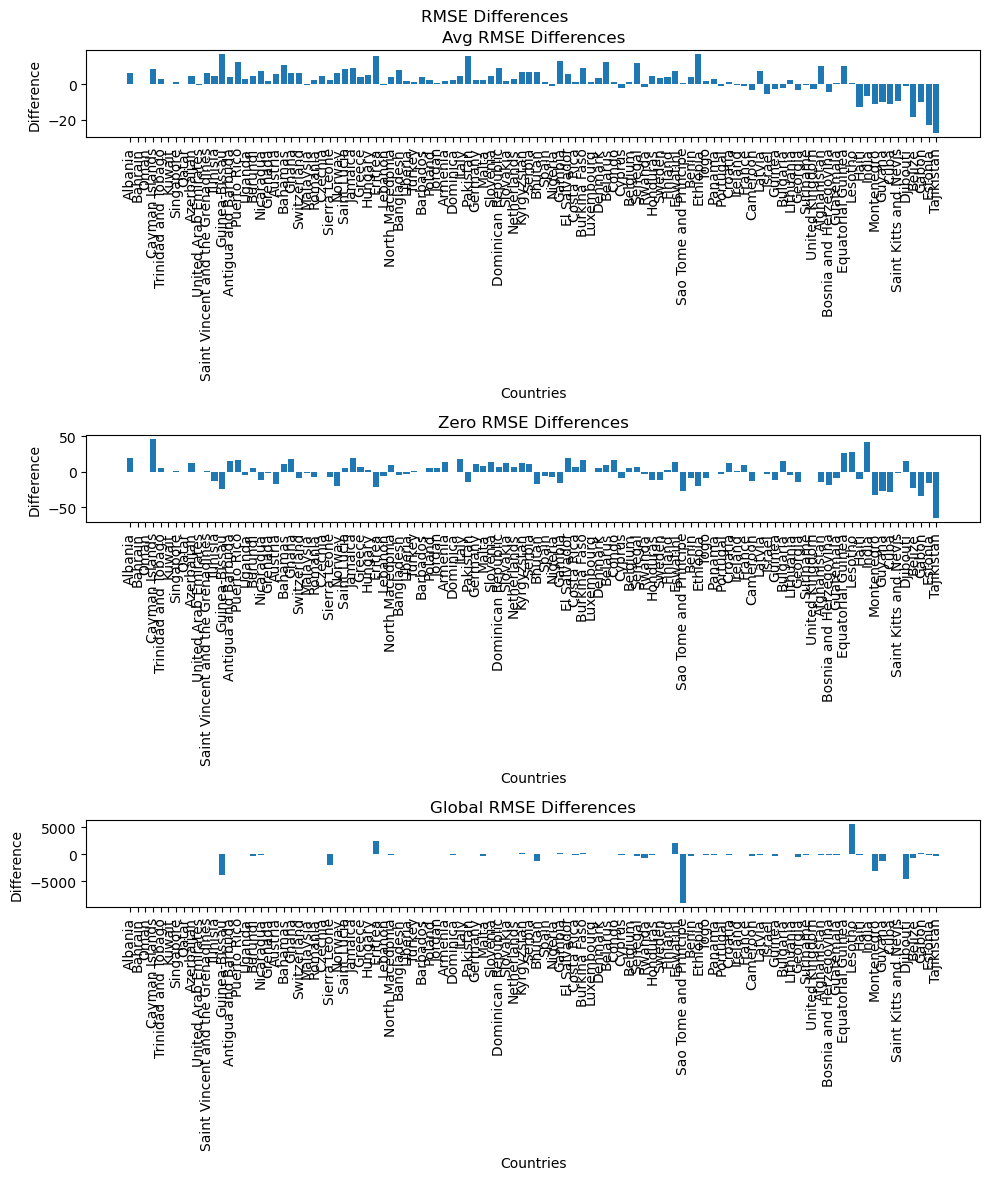

In [835]:
import matplotlib.pyplot as plt

# Assuming sorted_ct_rmse and sorted_ct_rmse_distance are lists of tuples with values for each country

countries = []
avg_rmse_diff = []
zero_rmse_diff = []
gl_rmse_diff = []

for idx, (country, avg_rmse, zero_rmse, gl_rmse) in enumerate(sorted_ct_rmse):
    for country_distance, avg_rmse_distance, zero_rmse_distance, gl_rmse_distance in sorted_ct_rmse_distance:
        if country == country_distance:
            countries.append(country)
            avg_rmse_diff.append(avg_rmse_distance - avg_rmse)
            zero_rmse_diff.append(zero_rmse_distance - zero_rmse)
            gl_rmse_diff.append(gl_rmse_distance - gl_rmse)
            break

# Creating subplots for each RMSE metric
fig, axs = plt.subplots(3, figsize=(10, 12))
fig.suptitle('RMSE Differences')

# Bar plot for Avg RMSE differences
axs[0].bar(countries, avg_rmse_diff)
axs[0].set_title('Avg RMSE Differences')
axs[0].set_xlabel('Countries')
axs[0].set_ylabel('Difference')
axs[0].tick_params(axis='x', rotation=90)  # Rotate x-axis labels

# Bar plot for Zero RMSE differences
axs[1].bar(countries, zero_rmse_diff)
axs[1].set_title('Zero RMSE Differences')
axs[1].set_xlabel('Countries')
axs[1].set_ylabel('Difference')
axs[1].tick_params(axis='x', rotation=90)  # Rotate x-axis labels

# Bar plot for Global RMSE differences
axs[2].bar(countries, gl_rmse_diff)
axs[2].set_title('Global RMSE Differences')
axs[2].set_xlabel('Countries')
axs[2].set_ylabel('Difference')
axs[2].tick_params(axis='x', rotation=90)  # Rotate x-axis labels

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


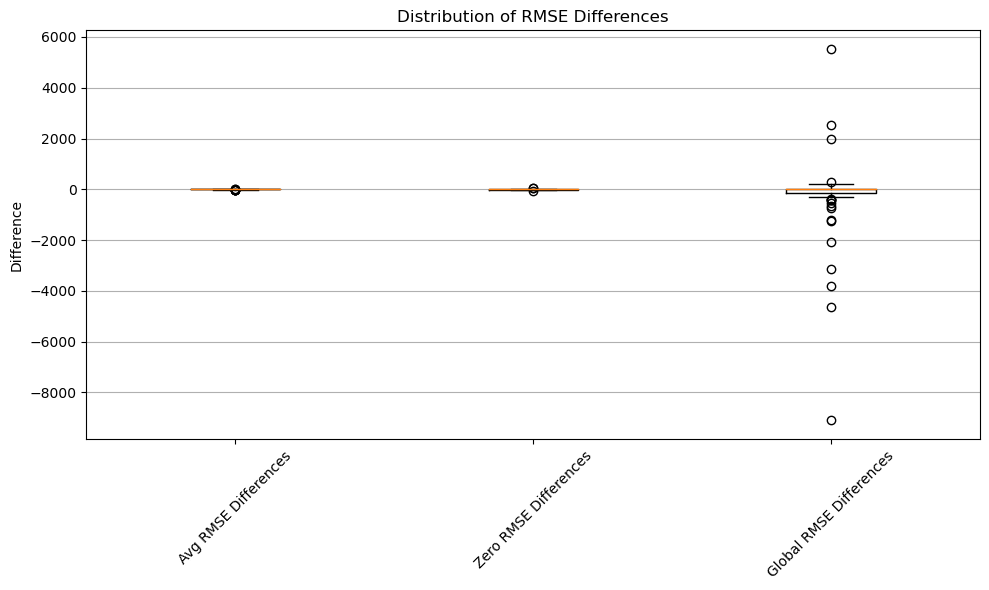

In [837]:
# Assuming avg_rmse_diff, zero_rmse_diff, gl_rmse_diff are lists containing the differences for each metric
data = [avg_rmse_diff, zero_rmse_diff, gl_rmse_diff]
labels = ['Avg RMSE Differences', 'Zero RMSE Differences', 'Global RMSE Differences']

plt.figure(figsize=(10, 6))
plt.boxplot(data, labels=labels)
plt.title('Distribution of RMSE Differences')
plt.ylabel('Difference')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.tight_layout()
plt.show()


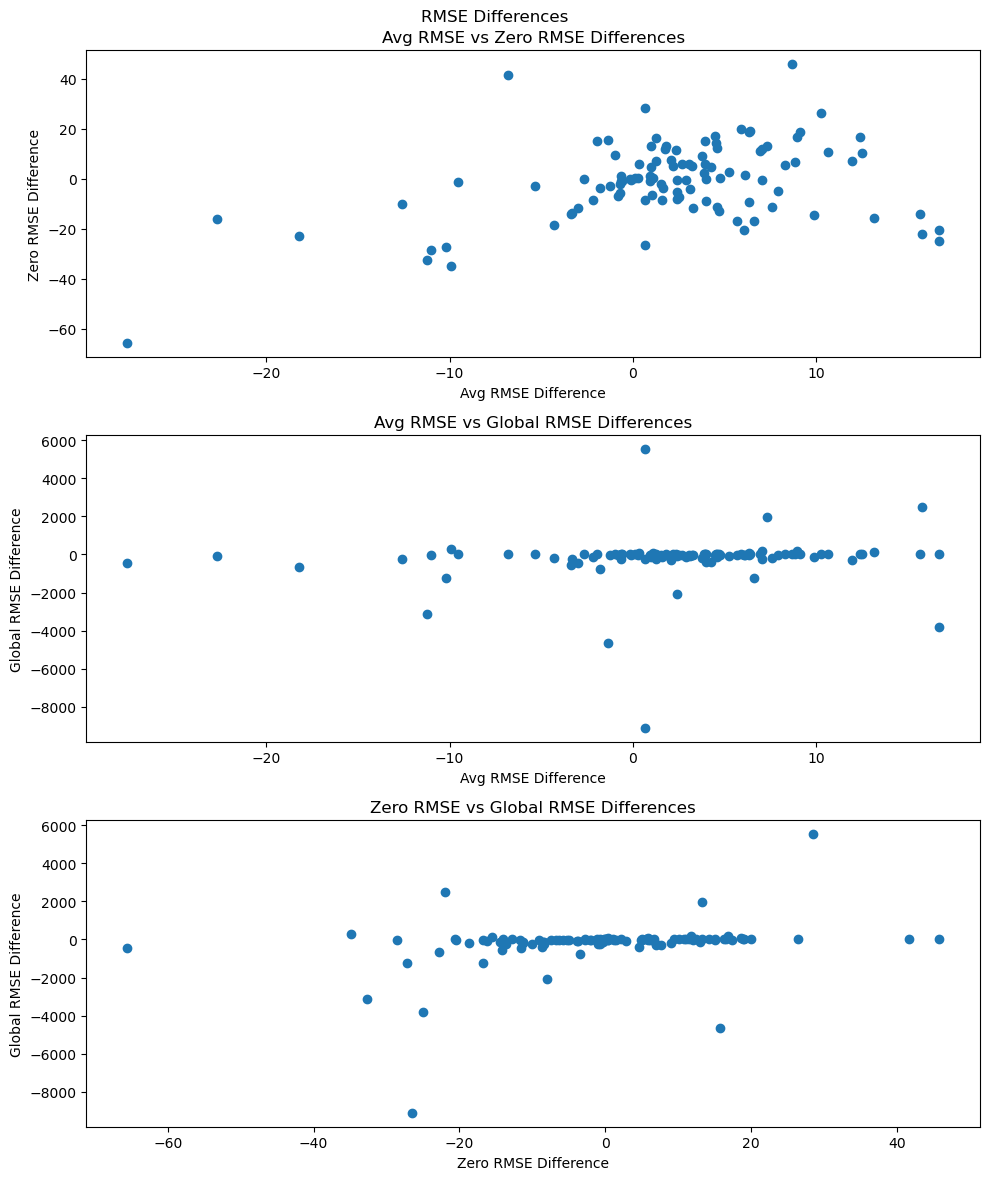

In [838]:
# Assuming sorted_ct_rmse and sorted_ct_rmse_distance are lists of tuples with values for each country
fig, axs = plt.subplots(3, figsize=(10, 12))
fig.suptitle('RMSE Differences')

axs[0].scatter(avg_rmse_diff, zero_rmse_diff)
axs[0].set_title('Avg RMSE vs Zero RMSE Differences')
axs[0].set_xlabel('Avg RMSE Difference')
axs[0].set_ylabel('Zero RMSE Difference')

axs[1].scatter(avg_rmse_diff, gl_rmse_diff)
axs[1].set_title('Avg RMSE vs Global RMSE Differences')
axs[1].set_xlabel('Avg RMSE Difference')
axs[1].set_ylabel('Global RMSE Difference')

axs[2].scatter(zero_rmse_diff, gl_rmse_diff)
axs[2].set_title('Zero RMSE vs Global RMSE Differences')
axs[2].set_xlabel('Zero RMSE Difference')
axs[2].set_ylabel('Global RMSE Difference')

plt.tight_layout()
plt.show()


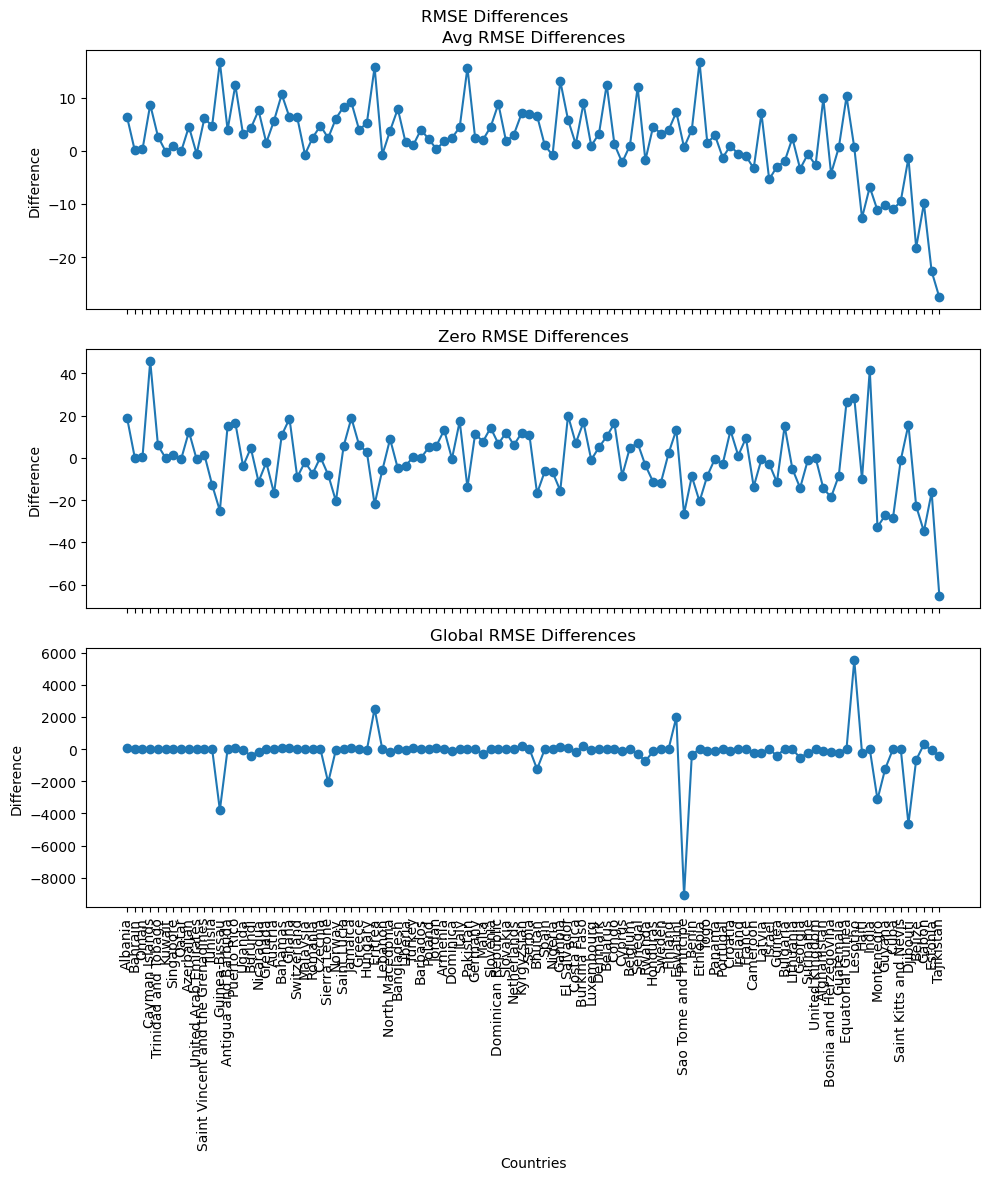

In [839]:
# Assuming sorted_ct_rmse and sorted_ct_rmse_distance are lists of tuples with values for each country
fig, axs = plt.subplots(3, figsize=(10, 12), sharex=True)
fig.suptitle('RMSE Differences')

axs[0].plot(countries, avg_rmse_diff, marker='o', linestyle='-')
axs[0].set_title('Avg RMSE Differences')
axs[0].set_ylabel('Difference')

axs[1].plot(countries, zero_rmse_diff, marker='o', linestyle='-')
axs[1].set_title('Zero RMSE Differences')
axs[1].set_ylabel('Difference')

axs[2].plot(countries, gl_rmse_diff, marker='o', linestyle='-')
axs[2].set_title('Global RMSE Differences')
axs[2].set_xlabel('Countries')
axs[2].set_ylabel('Difference')

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
